In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

In [54]:
df_trec = pd.read_parquet("../../../data/metadata_TREC.parquet")

In [10]:
# Urls containing the papers related to the Web Tracks from 2009 - 2013

link_list = [
"https://pages.nist.gov/trec-browser/trec18/web/proceedings/",
"https://pages.nist.gov/trec-browser/trec19/web/proceedings/",
"https://pages.nist.gov/trec-browser/trec20/web/proceedings/",
"https://pages.nist.gov/trec-browser/trec21/web/proceedings/",
]

In [11]:
import re
pattern = re.compile(r'trec\d{2}')

# Assigning run names to the corresponding papers
results = []
for i in link_list:
    response = requests.get(i)
    match = pattern.search(i)
    trec_version = match.group()
    soup = BeautifulSoup(response.text, 'html.parser')
    
    h4_tags = soup.find_all('h4')
    
    for h4 in h4_tags:
        next_elements = h4.find_all_next()
        for el in next_elements:
            if el.name == 'p':
                ul_elements = el.find_all_next('ul')
                for ul in ul_elements:
                    if ul.previous_sibling == el or ul.previous_sibling == '\n':
                        strong_tags = ul.find_all_previous('strong')
                        if strong_tags:                  
                            a_tags = ul.find_all('a')
                            pdf_link = None
                            runs = []
                            team_name = None
                            for a in a_tags:
                                href = a.get('href')
                                if 'pdf' in href:
                                    pdf_link = a.get_text()
                                elif "/runs/" in href:
                                    runs.append(a.get_text())
                                elif "/participants/" in href:
                                    team_name = a.get_text()
                            
                            results.append([team_name, pdf_link, runs, trec_version])

In [12]:
participant_df = pd.DataFrame(results, columns=["Team", "URL", "runs", "trec"])

In [13]:
participant_df = participant_df.drop_duplicates(subset=["Team", "URL", "trec"])

In [17]:
participant_df

,Team,URL,runs,trec
0,ICTNET,http://trec.nist.gov/pubs/trec18/papers/ictnet...,"[ICTNETDivR1, ICTNETDivR3, ICTNETADRun3, ICTNE...",trec18
1,UDel,http://trec.nist.gov/pubs/trec18/papers/udelaw...,"[udelIndDMRM, udelIndDRSP, udelSimPrune, udelF...",trec18
2,Waterloo,http://trec.nist.gov/pubs/trec18/papers/uwater...,"[watd1, watd3, watd5, watwp, watrrfw, uwgym, w...",trec18
3,msrc,http://trec.nist.gov/pubs/trec18/papers/micros...,"[MS1, MS2, MSDiv2, MSDiv1, MSDiv3]",trec18
4,IRRA,http://trec.nist.gov/pubs/trec18/papers/muglau...,"[irra1a, irra2a, irra3a, irra1d, irra2d, irra3d]",trec18
5,MSRAsia,http://trec.nist.gov/pubs/trec18/papers/micros...,"[MSRANORM, MSRAAF, MSRAC, MSRABASE, MSRACS, MS...",trec18
6,RMIT,http://trec.nist.gov/pubs/trec18/papers/rmit.W...,"[RmitLm, RmitOkapi, RmitDiv]",trec18
7,ICTNET,http://trec.nist.gov/pubs/trec18/papers/ictnet...,"[ICTNETDivR1, ICTNETDivR3, ICTNETADRun3, ICTNE...",trec18
8,utwente,http://trec.nist.gov/pubs/trec18/papers/utwent...,"[twCSrs9N, twCSrsR, twJ48rsU, twCSodpRNB, twCS...",trec18
9,UAms,http://trec.nist.gov/pubs/trec18/papers/uamste...,"[uvaee, uvamrf, uvamrftop, uvaaol, spc, tm]",trec18


In [18]:
# Url list containing the websites with the actual results linked to the run names
link_list = [
"https://pages.nist.gov/trec-browser/trec18/web/results/",
"https://pages.nist.gov/trec-browser/trec19/web/results/",
"https://pages.nist.gov/trec-browser/trec20/web/results/",
"https://pages.nist.gov/trec-browser/trec21/web/results/",
]

In [19]:
requested_results = ["summary (trec_eval)", "summary (gdeval)", "summary (gdeval)", "summary (gdeval)"]

In [20]:
pattern_measure_list = [re.compile(r"map\s+all\s+(\d+\.\d+)"), 
                        re.compile(r"err\s+all\s+(\d+\.\d+)"),
                        re.compile(r"err\s+all\s+(\d+\.\d+)"),
                        re.compile(r"err\s+all\s+(\d+\.\d+)")]

In [21]:
results = []
pattern = re.compile(r'trec\d{2}')

decimal_pattern = re.compile(r'^.*?(\d+\.\d+)')
pattern_ndcg_10 = re.compile(r"ndcg_cut_10\s+all\s+(\d+\.\d+)")

# Extract the run name and the corresponding MAP score
for i in range(len(link_list)):
    response = requests.get(link_list[i])
    match = pattern.search(link_list[i])
    trec_version = match.group()
    soup = BeautifulSoup(response.text, 'html.parser')
    h4_tags = soup.find_all('h4')

    for h4 in h4_tags:
        details_tags = h4.find_all_next('details')
        
        for details in details_tags:
            summary = details.find('summary')
            if summary and requested_results[i] in summary.text:
                div = summary.find_next_sibling('div')
                if div:
                    code_tag = div.find('code')
                    if code_tag:
                        code_text = code_tag.get_text(strip=True)
                        print(code_text)
                        match = pattern_measure_list[i].search(code_text)

                        if match:
                            print("Match found")
                            decimal_number = match.group(1)

                            results.append([h4.get_text(strip=True)[:-1], decimal_number, trec_version])
                            break

map             all 0.0592
bpref           all 0.1699
recip_rank      all 0.1762
P_10            all 0.1480
P_100           all 0.1150
P_1000          all 0.0407
Match found
map             all 0.0511
bpref           all 0.1062
recip_rank      all 0.3664
P_10            all 0.2720
P_100           all 0.0846
P_1000          all 0.0128
Match found
map             all 0.0895
bpref           all 0.2245
recip_rank      all 0.4324
P_10            all 0.3760
P_100           all 0.1392
P_1000          all 0.0363
Match found
map             all 0.0694
bpref           all 0.1844
recip_rank      all 0.1493
P_10            all 0.1420
P_100           all 0.1240
P_1000          all 0.0448
Match found
map             all 0.0404
bpref           all 0.1516
recip_rank      all 0.1670
P_10            all 0.1640
P_100           all 0.0824
P_1000          all 0.0345
Match found
map             all 0.0601
bpref           all 0.1712
recip_rank      all 0.1359
P_10            all 0.1180
P_100           all 0.

In [22]:
results

[['pkuSewmTp', '0.0592', 'trec18'],
 ['watwp', '0.0511', 'trec18'],
 ['watrrfw', '0.0895', 'trec18'],
 ['UMHOObm25GS', '0.0694', 'trec18'],
 ['UMHOObm25IF', '0.0404', 'trec18'],
 ['UMHOOqlGS', '0.0601', 'trec18'],
 ['UMHOOqlIF', '0.0564', 'trec18'],
 ['yhooumd09BGM', '0.0650', 'trec18'],
 ['pkuStruct', '0.0618', 'trec18'],
 ['yhooumd09BGC', '0.0736', 'trec18'],
 ['yhooumd09BFM', '0.0383', 'trec18'],
 ['pkuLink', '0.0449', 'trec18'],
 ['THUIR09An', '0.0502', 'trec18'],
 ['THUIR09TxAn', '0.0715', 'trec18'],
 ['Sab9wtBase', '0.0372', 'trec18'],
 ['Sab9wtBf1', '0.0523', 'trec18'],
 ['Sab9wtBf2', '0.0443', 'trec18'],
 ['uvaee', '0.0682', 'trec18'],
 ['uvamrf', '0.0626', 'trec18'],
 ['uvamrftop', '0.1092', 'trec18'],
 ['twCSrs9N', '0.0297', 'trec18'],
 ['twCSrsR', '0.0403', 'trec18'],
 ['twJ48rsU', '0.0284', 'trec18'],
 ['WatSdmrm3', '0.0625', 'trec18'],
 ['WatSql', '0.0564', 'trec18'],
 ['WatSdmrm3we', '0.0976', 'trec18'],
 ['THUIR09LuTA', '0.0522', 'trec18'],
 ['MS1', '0.0651', 'trec18'],


In [23]:
# Assign the run results (MAP score for 2009 and Expected Reciprocal Rank (ERR)) by run names to the papers
run_results_per_paper = []
for i,j in participant_df.iterrows():
    result_list = []
    for k in j["runs"]:
        for l in results:
            if k in l and j["trec"] in l:
                result_list.append(l[1])
                break
    run_results_per_paper.append(result_list)

In [24]:
participant_df["results"] = run_results_per_paper

In [25]:
# Extract the best run for every paper into another column

participant_df['best results'] = participant_df['results'].apply(lambda x: max(x) if x else None)

In [39]:
participant_df = participant_df.dropna(subset=['best results'])

In [40]:
participant_df

,Team,URL,runs,trec,results,best results
2,Waterloo,http://trec.nist.gov/pubs/trec18/papers/uwater...,"[watd1, watd3, watd5, watwp, watrrfw, uwgym, w...",trec18,"[0.0511, 0.0895, 0.0669]",0.0895
3,msrc,http://trec.nist.gov/pubs/trec18/papers/micros...,"[MS1, MS2, MSDiv2, MSDiv1, MSDiv3]",trec18,"[0.0651, 0.0866]",0.0866
5,MSRAsia,http://trec.nist.gov/pubs/trec18/papers/micros...,"[MSRANORM, MSRAAF, MSRAC, MSRABASE, MSRACS, MS...",trec18,"[0.0832, 0.0829, 0.0867]",0.0867
8,utwente,http://trec.nist.gov/pubs/trec18/papers/utwent...,"[twCSrs9N, twCSrsR, twJ48rsU, twCSodpRNB, twCS...",trec18,"[0.0297, 0.0403, 0.0284]",0.0403
9,UAms,http://trec.nist.gov/pubs/trec18/papers/uamste...,"[uvaee, uvamrf, uvamrftop, uvaaol, spc, tm]",trec18,"[0.0682, 0.0626, 0.1092]",0.1092
11,THUIR,http://trec.nist.gov/pubs/trec18/papers/tsingh...,"[THUIR09An, THUIR09TxAn, THUIR09LuTA, THUIR09Q...",trec18,"[0.0502, 0.0715, 0.0522]",0.0715
13,UMD,http://trec.nist.gov/pubs/trec18/papers/umd-ya...,"[UMHOObm25GS, UMHOObm25IF, UMHOObm25B, UMHOOsd...",trec18,"[0.0694, 0.0404, 0.0601, 0.0564]",0.0694
14,uogTr,http://trec.nist.gov/pubs/trec18/papers/uglasg...,"[uogTrdphP, uogTrdphCEwP, uogTrdphA, uogTrDYSc...",trec18,[0.0671],0.0671
17,pku2009,http://trec.nist.gov/pubs/trec18/papers/peking...,"[pkuSewmTp, pkuStruct, pkuLink]",trec18,"[0.0592, 0.0618, 0.0449]",0.0618
18,UWaterlooMDS,http://trec.nist.gov/pubs/trec18/papers/uwater...,"[WatSklq, WatSklfu, WatSklfb, WatSdmrm3, WatSq...",trec18,"[0.0625, 0.0564, 0.0976]",0.0976


In [55]:
# Merge the run results to the original trec DataFrame and drop unrelated TREC papers by inner join

df_trec = pd.merge(df_trec, participant_df, how="inner", left_on="url", right_on="URL")

In [56]:
# Assign citation scores of Semantic Scholar to the papers

def add_SemanticCitations(df, path):
    with open(path, 'r', encoding="utf-8") as file:
        SemanticCitations = json.load(file)
    
    citations_semantic = []
    for i in SemanticCitations:
        try:
            citations_semantic.append([i, SemanticCitations[i]["citationCount"]])
        except:
            print(i)
    df_citations = pd.DataFrame(citations_semantic, columns=["ID", "Citations_semantic"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "ID", right_on="ID")
    return merge

In [57]:
df_trec = add_SemanticCitations(df_trec, "../../../data/SemanticScholar_TREC_additional_metadata.json")

In [58]:
# Assign citation scores of OpenAlex to the papers

def add_OpenAlexCitations(df, path):
    with open(path, 'r', encoding="utf-8") as file:
        OpenAlexCitations = json.load(file)
    
    citations_OpenAlex = []
    for i in OpenAlexCitations:
        try:
            citations_OpenAlex.append([i, OpenAlexCitations[i]["cited_by_count"]])
        except:
            print(i)
    df_citations = pd.DataFrame(citations_OpenAlex, columns=["ID", "Citations_OpenAlex"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "ID", right_on="ID")
    return merge

In [59]:
df_trec = add_OpenAlexCitations(df_trec, "../../../data/OpenAlex_TREC.json")

In [60]:
df_trec['best results'] = pd.to_numeric(df_trec['best results'], errors='coerce')

In [61]:
# Calculate the rank for MAP or ERR respectively
df_trec['measure_rank'] = df_trec.groupby('trec')['best results'].rank(ascending=False, method='min')

# Calculate Correlation for Semantic Citation Data

In [66]:
results = {
    'Year': [],
    'Pearson_corr': [],
    'Pearson_p_value': [],
    'Spearman_corr': [],
    'Spearman_p_value': []
}

# Iterate over every year
for year in df_trec['PubYear'].unique():
    subset = df_trec[df_trec['PubYear'] == year]
    subset = subset.dropna(subset=["Citations_semantic"])
    pearson_corr, pearson_p = pearsonr(subset['best results'], subset['Citations_semantic'])
    
    spearman_corr, spearman_p = spearmanr(subset['measure_rank'], subset['Citations_semantic'])
    
    results['Year'].append(year)
    results['Pearson_corr'].append(pearson_corr)
    results['Pearson_p_value'].append(pearson_p)
    results['Spearman_corr'].append(spearman_corr)
    results['Spearman_p_value'].append(spearman_p)

results_df = pd.DataFrame(results)
print(results_df)

   Year  Pearson_corr  Pearson_p_value  Spearman_corr  Spearman_p_value
0  2009      0.149238         0.701562      -0.266667          0.487922
1  2010      0.407734         0.147854      -0.485607          0.078352
2  2011      0.335612         0.416382      -0.439155          0.276327
3  2012      0.242518         0.529525      -0.144693          0.710329


In [67]:
results = {
    'Year': [],
    'Pearson_corr': [],
    'Pearson_p_value': [],
    'Spearman_corr': [],
    'Spearman_p_value': []
}

for year in df_trec['PubYear'].unique():
    subset = df_trec[df_trec['PubYear'] == year]
    
    subset = subset.dropna(subset=['best results', 'measure_rank', 'Citations_OpenAlex'])
    
    if len(subset) > 1:  # Pearson und Spearman require atleast 2 data points
        # Pearson-Correlation for best NDCG@10 result and citation rate
        pearson_corr, pearson_p = pearsonr(subset['best results'], subset['Citations_OpenAlex'])
        
        # Spearman-Correlation for ndcg_rank and citation rate
        spearman_corr, spearman_p = spearmanr(subset['measure_rank'], subset['Citations_OpenAlex'])
    else:
        pearson_corr, pearson_p = np.nan, np.nan
        spearman_corr, spearman_p = np.nan, np.nan
    
    results['Year'].append(year)
    results['Pearson_corr'].append(pearson_corr)
    results['Pearson_p_value'].append(pearson_p)
    results['Spearman_corr'].append(spearman_corr)
    results['Spearman_p_value'].append(spearman_p)

results_df = pd.DataFrame(results)
print(results_df)

   Year  Pearson_corr  Pearson_p_value  Spearman_corr  Spearman_p_value
0  2009     -0.221757         0.566347       0.117651          0.763070
1  2010      0.275205         0.285031      -0.446246          0.072571
2  2011      0.585550         0.075314      -0.619679          0.056019
3  2012      0.541716         0.209124      -0.523937          0.227414


C:\Users\Andreas\AppData\Local\Temp\ipykernel_18040\1102194473.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


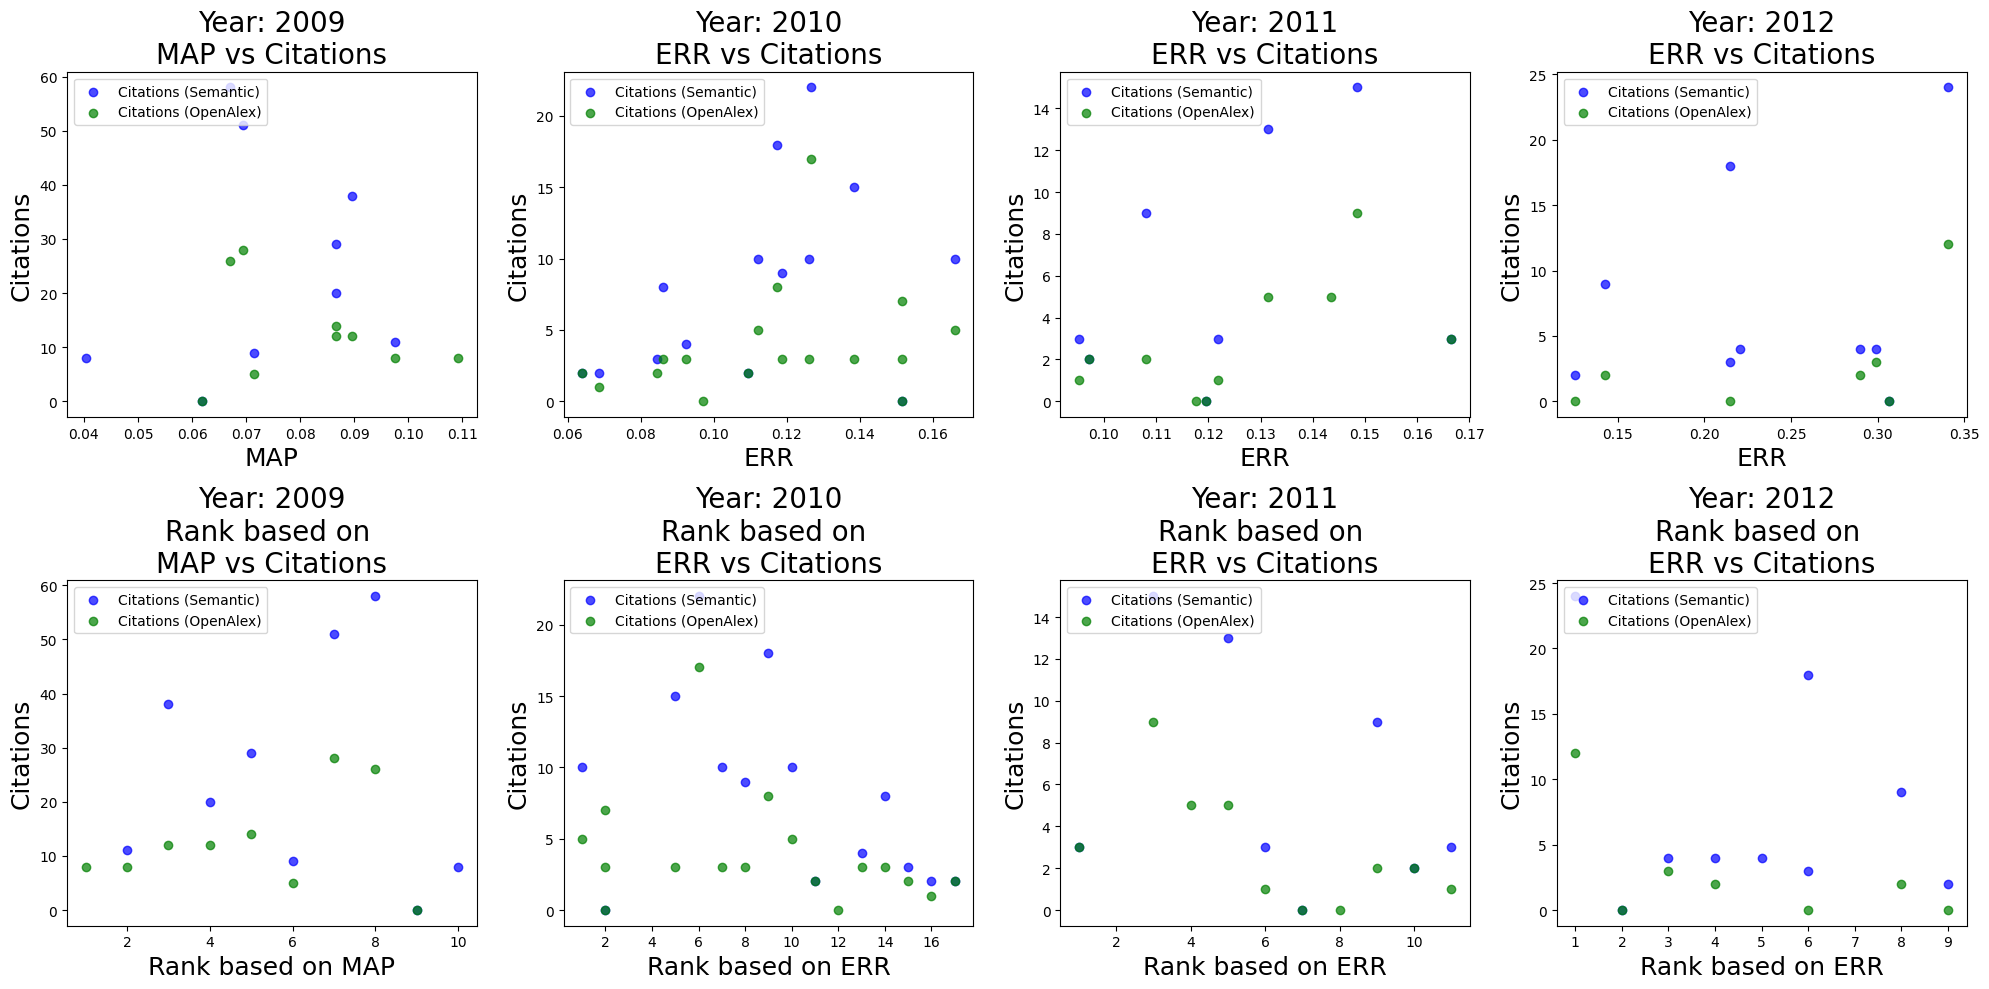

In [69]:
import matplotlib.pyplot as plt

years = sorted(df_trec['PubYear'].unique())
n_years = len(years)

fig, axs = plt.subplots(2, n_years, figsize=(5 * n_years, 10), constrained_layout=True)

measures = ["MAP", "ERR", "ERR", "ERR"]
for i, year in enumerate(years):
    subset = df_trec[df_trec['PubYear'] == year]
    
    axs[0, i].scatter(subset['best results'], subset['Citations_semantic'], alpha=0.7, label='Citations (Semantic)', color='blue')
    axs[0, i].scatter(subset['best results'], subset['Citations_OpenAlex'], alpha=0.7, label='Citations (OpenAlex)', color='green')
    axs[0, i].set_title(f'Year: {year}\n{measures[i]} vs Citations', fontsize=20)
    axs[0, i].set_xlabel(measures[i], fontsize=18)
    axs[0, i].set_ylabel('Citations', fontsize=18)
    axs[0, i].legend(loc='upper left')
    
    axs[1, i].scatter(subset['measure_rank'], subset['Citations_semantic'], alpha=0.7, label='Citations (Semantic)', color='blue')
    axs[1, i].scatter(subset['measure_rank'], subset['Citations_OpenAlex'], alpha=0.7, label='Citations (OpenAlex)', color='green')
    axs[1, i].set_title(f'Year: {year}\nRank based on \n{measures[i]} vs Citations', fontsize=20)
    axs[1, i].set_xlabel(f'Rank based on {measures[i]}', fontsize=18)
    axs[1, i].set_ylabel('Citations', fontsize=18)
    axs[1, i].legend(loc='upper left')
    
plt.tight_layout()
plt.savefig('../../../images/correlation_citation_result_web_track_new.png', dpi=300)  # Save the figure as a PNG file with 300 dpi
plt.show()